<center>
<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
##  II Escuela de Verano en Física Computacional

Autores: [Neisser Pino R.](https://scholar.google.com.pe/citations?user=pAB28NEAAAAJ&hl=es), [Ricardo Quispe M.](https://github.com/RcrdPhysics).\
Institución: Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 2. Raíces de ecuaciones

<img align="center" src="https://sites.google.com/site/ittgmetodosnumericos/_/rsrc/1334897944964/home/unidad-2-raices-de-ecuaciones/Imagen2.png?height=320&width=286"  width=45% />

## Outline
1. Ecuaciones lineales y no lineales
2. Método de bisección
3. Método de sustitución sucesiva
4. Método de Newton

# Introducción

El problema de hallar las raíces de una función consiste en:

- Dada una función continua $f(x) \in C[a,b]$ hallar los valores de x=r para los cuales se cumple:

$$f(r)=0$$

- El número x=r tal que se cumpla la f(r)=0 se conoce como la raíz de la ecuación f(x) o cero de la función f(x).

- El problema de hallar las raíces de una ecuación es uno de los más importantes problemas computacionales.

## 1. Ecuaciones lineales y no lineales

Hallar las raíces a ecuaciones no lineales suele ser un problema un poco complicado, esto se enfoca a algo más de sistemas.  Los puntos mínimos son aquellos que optimizan mi función

### Linealidad 

Un sistema o ecuación es lineal si satisface a las propiedades de aditividad:

$$f(x+y)=f(x)+f(y)$$

y homogeneidad 

$$f(ax)=af(x)$$

En caso contrario el sistema es **no lineal.**

Dicha de otra forma, ecuacion lineal es aquella que tiene la forma de un polinomio de primer grado, es decir las inc ́ognitas no estan elevadas a potencias ni multiplicadas entre sı. Ejemplo: $2x+3y=4$, $3x-5y+2z=1$

Ejemplo de sistemas no lineales: $x^2+x-1=0$ o $x-sinx=0$

### ¿Por qué usar métodos numéricos para hallar las raíces de una ecuación?

- La solución de la ecuación $f(r)$ puede ser muy difícil dependiendo de la naturaleza de f(x). Si f(x) es un polinomio de grado mayor que 4 o bien no es polinomica, no hay ninguna formula conocida de solucion.
- Salvo pocas excepciones, no es posible hallar expresiones analíticas para hallar las raíces como el caso de la ecuación cuadrática.
$$x=\frac{-b±\sqrt{b^2-4ac}}{2a}$$

- Necesidad de usar métodos num ́ericos, que siempre permite dar solución, aunque con cierta aproximacion.

- En la mayor ́ıa de los casos el problema se resuelve mediante metodos iterativos.

- La idea fundamental consiste en una primera aproximacion de la raíz, que luego hallar una secuencia de numeros que debe converger a la solucion

## 2. Método  de bisección

Es el metodo mas elemental y antiguo para determinar las raıces de una ecuacion. Se basa en el siguiente teorema:

**Teorema de Bolzano**

> Si una función continua, $f(x)$, toma en los extremos del intervalo $[a,b]$ valores de signo opuesto. entonces la función admite, al menos, una raíz en dicho intervalo.

Consiste en identificar el intervalo  $[a,b]$ tal que $f(a)f(b)< 0$. A partir de este punto se va reduciendo el intervalo sucesivamente hasta hacerlo tan pequeño como exija la precision.


Algoritmo:

1. Definir la función y el intervalo.
2. A continuación se verifica que ${\displaystyle f(a)\cdot f(b)<0}$.
3. Se calcula el punto medio ${\displaystyle m}$ del intervalo ${\displaystyle [a,b]}$ y se evalúa ${\displaystyle f(m)}$ si ese valor es igual a cero, ya hemos encontrado la raíz buscada.
4. En caso de que no lo sea, verificamos si ${\displaystyle f(m)}$ tiene signo opuesto con ${\displaystyle f(a)}$ o con ${\displaystyle f(b)}$.
5. Se redefine el intervalo ${\displaystyle [a,b]}$ como ${\displaystyle [a,m]}$ o ${\displaystyle [m,b]}$ según se haya determinado en cuál de estos intervalos ocurre un cambio de signo
6. Con este nuevo intervalo se continúa sucesivamente encerrando la solución en un intervalo cada vez más pequeño, hasta alcanzar la precisión deseada

In [ ]:
import numpy as np
 
#tol=1.0e-8

# y = f(x) --- Dom(f) = [a,b] >> (a diferente de b) a<<b
# Bisección: Puedo definir un dominio conveniente >> f(a)f(b) < 0 existe 1 raíz

#f: función 
#b: Extremo inferior del dominio
#a: Extremo superior del dominio
#tol: Error

def biseccion(f, a, b, tol):
    
    if a > b:
        raise ValueError("Intervalo mal de finido.")
    if tol <= 0:
        raise ValueError("La cota de error debe ser un número positivo.")
        
    x = (a + b) / 2.0                                 #x = Punto medio
    i=1
    
    while True:                                    #Realiza la condición hasta que se cumpla la condición de la tolerancia
        if b - a < tol:                                   #Hallamos el punto medio y vemos que sea menor que la tolerancia
            i+=1
            return(x,i)

        # Utilizamos la función signo para evitar errores de precisión
        
        elif np.sign(f(a)) * np.sign(f(x)) > 0:                         #+*- o +*+      - Analizo el signo
            i+=1                                                        #para el contador
            a = x                                                       #a toma un nuevo valor y si es negativo
        else:
            i+=1
            b = x                                                       #b toma un nuevo valor
        x = (a + b) / 2.0
    return(x,i)                                                         #Raíz de la función: (While ya no se cumple)


#OBS. MÉTODO (WHILE: Margen de error)           #Prioridad
#OBS. MÉTODO (FOR: Número de Iteraciones)

In [ ]:
tol=1.0e-8

In [ ]:
#Función seno Dom(f) = [-10,-6]
#Nos devuelve el valor de "x", donde f(x) = 0 y el número de iteraciones realizadas
biseccion(np.sin, -10,-6,tol)

(-9.424777958542109, 31)

Obtener la raíz de la siguiente función:
$$f(x) = 2x^3 -8x-2$$

In [ ]:
def pol_3(x):
    return(2*x**3-8*x-2)

In [ ]:
tol = 1.0e-10
biseccion(pol_3,-1,1,tol)

(-0.2541016883624252, 37)

In [ ]:
#Nos dice el valor de y, con el cual hizo "Match" para hallar las raices, es decir, cuando se deja de cumplir el ciclo
pol_3(biseccion(pol_3,-1,1,tol)[0])

-2.000000165480742e-11

In [ ]:
error= (biseccion(pol_3,-1,1,tol))
error

(-0.2541016883624252, 37)

#### Relación entre el margen de error y el número de iteraciones

El método de bisección es menos eficiente que el método de Newton, pero es mucho más seguro para garantizar la convergencia. Si ${\displaystyle f}$ es una función continua en el intervalo ${\displaystyle [a,b]}$ y ${\displaystyle f(a)f(b)<0}$, entonces este método converge a la raíz de ${\displaystyle f}$. De hecho, una cota del error absoluto es:

$$l_n=\frac{|b-a|}{2^n}$$

In [ ]:
#Notar que esto no depende de la función 
b=3
a=1
cota_err_abs=np.abs(b-a)/2**31
cota_err_abs

9.313225746154785e-10

Como ${\displaystyle r_{n}}$, que es la raíz n-ésima calculada, se encuentra siempre dentro del intervalo de búsqueda, tenemos entonces que:

$$|r-r_n| \leq \frac{|b -a|}{2^n}$$

Queda demostrado entonces, que si se cumplen las condiciones iniciales del problema, el método de bisección converge al menos, a una de las raíces que se encuentran en el intervalo señalado.

La bisección converge linealmente, por lo cual es un poco lento. Sin embargo, se garantiza la convergencia si ${\displaystyle f(a)}$ y ${\displaystyle f(b)}$ tienen distinto signo.

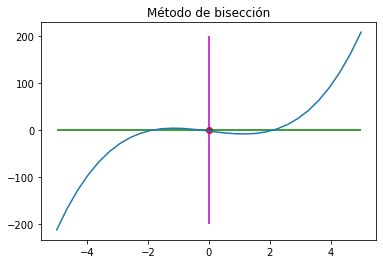

In [ ]:
import matplotlib.pyplot as plt

#Podemos gráficar la raíz

x1=np.linspace(-5,5,30)
y1=pol_3(x1)
plt.title('Método de bisección')
plt.plot(x1,y1)
plt.scatter(0,-0.2541016899049282, c='r')
plt.hlines(0,-5,5,'g')
plt.vlines(0,-200,200,'m')
plt.show()

#### Ventajas 
1.- Seguridad en la existencia de la raíz

#### Desventajas
1.Un inconveniente de este método es que sólo nos brinda una raíz por cada ves que se utiliza el método


2.- Es un método muy lento, debido a que realiza varias operaciones hasta buscar un margen de error




# 3. Método de Newton

El método de Newton o método de Newton-Raphson linealiza la función a cada paso utilizando su derivada, que se debe proporcionar como argumento, para hallar la raíz de la ecuación en las proximidades de un punto inicial $x_{0}$. Este método puede no converger, pero si el punto inicial está lo suficientemente próximo a la raíz, la convergencia será muy rápida.

- El método de recursión de Newton es muy efectivo y simple de
implementar.
-Pertenece a los métodos abiertos.
-Conocido también como Newton-Rapson.
-La función debe ser derivable en el intervalo que interesa-
-Partiendo de un valor tentativo de la raíz, se va mejorando
recursivamente aproximando el siguiente valor de la raíz como la
intersección con el eje de $x$ la linea tangente en el punto anterior de $x$.
-Consiste en elegir adecuadamente un valor de prueba $x_{0}$ de tal manera que $f(x_{0})$ sea no muy grande.
-La tangente en el punto $x=x_{0}$ es $f^{'}(x_{0})$, y dela ecuación de la linea tangete que pasa por los puntos $(x_{0},f(x_{0}))$ y $(x_{1},f(x_{1})=0)$ se obtiene la siguiente aproximación


$$x_{1}=x_{0}- \frac{f(x_{0})}{f^{'}(x_{0})}$$

-Este procedimiento se repite recursivamente hasta lograr la tolerancia especificada.

$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f^{'}(x_{n})}$$

Cuando la primera prueba $x_{0}$ es bastante cercana al valor verdadero, los valores sucesivos $x_{n}$ son cada vez más cercanos y tienden a un valor fijo.



<img align="center" src="https://qph.fs.quoracdn.net/main-qimg-b3ff8a5f14c4a4e7525533518dbcd7f0.webp"  width=60% />

In [ ]:
#Aquí si le doy la tolerancia, las iteraciones, y las tolerancias
def newton(f, df, x_0, maxiter=50, xtol=1.0e-6, ftol=1.0e-6):
    
    x = float(x_0)
    for i in range(maxiter):
        dx = -f(x) / df(x)                                                      # ¡Aquí se puede producir una división por cero! CUIDADO
                                                                                # También x puede haber quedado fuera del dominio
        x = x + dx
        if abs(dx / x) < xtol and abs(f(x)) < ftol:
            return (x,i)

OBS:


- El método garantiza como mínimo convergencia cuadrática.
-Necesidad de calcular la derivada, complicaciones.
-El punto de partida tiene que ser muy cercano a la raíz buscada.
-Caso contrario puede no se podría la raíz.

$$f(x)=sen(x^2)-x^3-1$$

$$f'(x)=2xcos(x^2)-3x^2$$

In [ ]:
#Debemos calcular la derivada a mano
def f(x):
    return np.sin(x**2) - x**3 - 1

# Su derivada    
def df(x):
    return 2*x*np.cos(x**2) - 3*x**2 

In [ ]:
newton(f,df,0.1)

(-0.7649722604107942, 19)

In [ ]:
def g(x):
  return np.sin(x)
def dg(x):
  return np.cos(x)


In [ ]:
#Comparación entre los dos diferentes métodos

print(biseccion(g,-10,-6,1.0e-6))

print(newton(g,dg,-9,maxiter=50, xtol= 1.0e-6, ftol= 1.0e-6)) 

(-9.424777507781982, 24)
(-9.42477796076938, 2)



#### *BISECCIÓN*: *GARANTIZA LA RAÍZ, PERO ES UN MÉTODO LENTO*

#### *NEWTON: NO GARANTIZA LA EXISTENCIA DE LA RAÍZ (pto. inicial), PERO ES UN PROCESO RÁPIDO*


#### MÉTODO ADAPTATIVO (Bisección-Newton):
1.- Bisección: Garantiza la existencia de la raíz, calcular ráiz aproximando hasta un punto referencia.


2.- Newton: Aplicando un punto referencial, obtenemos la raíz final





El método de Newton sólo considera dos iteraciones para poder llegar a la solución, mientras que bisección requirió 24 iteraciones.

Esto nos puede servir para realizar una conjunción entre ambos métodos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

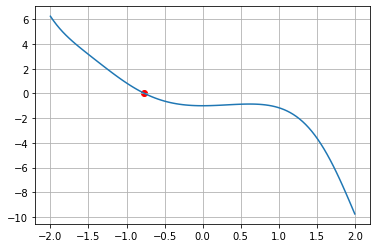

In [ ]:
# for demo reasons:
interval_left = -2
interval_right = 2

xvals = np.linspace(interval_left, interval_right, num=100)

yvals = f(xvals)

plt.plot(xvals,yvals)
zr = newton(f,df,0.01)[0]
plt.scatter(zr,f(zr), c='r')
#plt.scatter(0,newton(f,fp,0.1)[0],c='r')             #También se puede hacer esto
plt.grid()
plt.show()

# 3. Método de punto fijo

Consiste en

-Dada la función $f(x)$, se reordena para obtener expresión de $x$

$$f(x)\Leftrightarrow g(x)=x$$

-Si se resuelve $g(x)$ se resuelve f(x)=0
-Solución de $g(x)$ mediante

$$x_{i+1}=g(x_{i})$$

hasta que $x_{i+1}$ converge a $x_{i}$

imagen*

Ejemplo: Raíz de la función  $e^{-x}-x=0$

imagen*

Función $f(x)=x^{2}-2x-3=0$
Las raíces son $(x_{1}=3,x_{2}=-1)$

Se puede reescribir de 3 formas

1) $x^{2}=2x+3 \Rightarrow , g(x)=\sqrt{2x+3}$

2)$x(x-2)-3=0, \Rightarrow g(x)=\frac{3}{x-2}$

3) $ 2x=x^{2}-3, \Rightarrow g(x)=\frac{x^{2}-3}{2} $

¿Cual de los esquemas es mejor?



In [ ]:
def puntofijo(gx,a,tol, itermax = 15):                                              #Requiere un gx especifico
    i = 1                                                                           # iteración   
    b = gx(a)                                                                       #Función evaluada en x=a
    tramo = abs(b-a)                                                                #Margen de error Eje X
    while (tramo>=tol and i<=itermax ):
        a = b
        b = gx(a)                                                                   #Cumple la identidad
        tramo = abs(b-a)
        i = i + 1
    respuesta = b
    
    # Validar respuesta
    if (i>=itermax):
        respuesta = np.nan                                                          #Convergencia
    return(respuesta)


In [ ]:
def f_x(x):
  return(np.e**(-x)-x)
def g_x(x):
  return(np.e**(-x))

a = 0                                                                             # intervalo
b = 1
tolera = 0.001
iteramax = 15                                                                     # itera máximo
muestras = 51                                                                       # gráfico
tramos = 50

# PROCEDIMIENTO
respuesta = puntofijo(g_x,a,tolera)

# SALIDA
respuesta



print('x_raiz:',respuesta)
print('g:     ',g_x(respuesta)) 
print('f:     ',f_x(respuesta))                                                  #f(x) es la raíz y g(x) es el punto fijo

x_raiz: 0.5669089119214953
g:      0.5672762321755697
f:      0.00036732025407437696


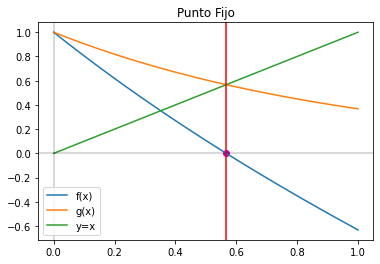

In [ ]:
# GRAFICA
# calcula los puntos para fx y gx
xi = np.linspace(a,b,muestras)
fi = f_x(xi)
gi = g_x(xi)
yi = xi

import matplotlib.pyplot as plt

plt.plot(xi,fi, label='f(x)')                                                   #Función original de la que quiero encontrar su raíz
plt.plot(xi,gi, label='g(x)')                                                   #Función g(x) del punto fijo
plt.plot(xi,yi, label='y=x')                                                    #Función identidad

if (respuesta != np.nan):                                                       #nan - no número - #vacío (Verifica si el método converge)
    plt.axvline(respuesta, color='r')                                           #Me marca una recta vertical, con "x" igual a la respuesta. Representa el punto de intersección entre la identidad y la función g(x)
plt.axhline(0, color='k', alpha = 0.2)                                          #Eje X
plt.axvline(0, color='k', alpha = 0.2)                                          #Eje Y
plt.scatter(respuesta,f_x(respuesta), color = 'm')
plt.title('Punto Fijo')
plt.legend(loc= 'best')
plt.show()


In [ ]:
#Utilizando una librería
import scipy.optimize as opt
opt.fixed_point(g_x,a,xtol=0.001,maxiter=15)

array(0.56714329)

#4- Método de la Secante

La recta secante es una recta que corta a una circunferencia en dos puntos. Conforme estos puntos de corte se acercan, dicha recta se aproxima a un punto y, cuando solo existe un punto que toca la circunferencia, se le llama tangente.

Dados los puntos de intersección A y B puede calcularse la ecuación de la recta secante empleando para saber la respuesta de ésta operación se emplea en matemáticas la ecuación de la recta que pasa por dos puntos.

En análisis numérico el método de la secante es un método para encontrar los ceros de una función de forma iterativa. Uno de los objetivos de este método es eliminar el problema de la derivada de la función, ya que existen funciones que describen fenómenos físicos en la vida real, cuya derivada es muy compleja. El método de la secante es muy similar al de Newton con la diferencia principal que en este método de la secante no requiere de la segunda derivada.

El método se basa en obtener la ecuación de la recta que pasa por los puntos $(x_{n−1})$, $f(x_{n−1}))$ y $(x_{n}, f(x_{n}))$. A dicha recta se le llama secante por cortar la gráfica de la función. Posteriormente se escoge como siguiente elemento de la relación de recurrencia, $x_{n+1}$, la intersección de la recta secante con el eje de abscisas obteniendo la fórmula.

$$ y=\frac{yA-yB}{xA-xB}x + \frac{xAyB-xByA}{xA-xB}$$

Este método, a diferencia del de bisección y regla falsa, casi nunca falla ya que solo requiere de 2 puntos al principio, y después el mismo método se va retroalimentando. Lo que hace básicamente es ir tirando rectas secantes a la curva de la ecuación que se tiene originalmente, y va checando la intersección de esas rectas con el eje de las $X$ para ver si es la raíz que se busca.

El método de la secante parte de dos puntos (y no sólo uno como el método de Newton) y estima la tangente (es decir, la pendiente de la recta) por una aproximación de acuerdo con la expresión gráfica siguiente:

imagen*

En la siguiente iteración, emplearemos los puntosx1 yx2 para estimar un nuevo punto más próximo a la raíz de acuerdo con la ecuación de arriba. En la figura se representa geométricamente este método.

En general, el método de la secante presenta las mismas ventajas y limitaciones que el método de Newton-Raphson.

Forma de hacerlo:

Primero hay que definir algunos conceptos como:

$X_{n}$: es el valor actual de $X$

$X_{n- 1}$: es el valor anterior de $X$

$X_{n+1}$: es el valor siguiente de $X$

Para simplificar la formula que se usa en este método se dirá que:

$A=X_{n-1}$

$B=X_{n+1}$

$C=X_{n}$

Como su nombre lo dice, este método va trazando rectas secantes a la curva original, y como después del primer paso no depende de otras cantidades sino que solito va usando las que ya se obtuvieron, casi nunca falla porque se va acomodando hasta que encuentra la raíz.

El método se define por la relación de recurrencia:

$$x_{n+1}=x_{n}-\frac{x_{n}-x_{n-1}}{f(x_{n})-f(x_{n-1})}f(x_{n}) $$

Como se puede ver, este método necesitará dos aproximaciones iniciales de la raíz para poder inducir una pendiente inicial.

In [ ]:
#Necesitamos dos puntos iniciales y una función que sea continua
#Un punto inicial y el segundo, me da la orientación hacía donde me desplazo

#eps - tolerancia
def secant(f, x0, x1, eps):
    import sys
    global x                                                                    #Va a tener el mismo comportamiento, es una variable global
                                                                                #De hecho sino se coloca como variable global, surgirá un error
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0                                                       #Variable auxiliar, mi contador

    while abs(f_x1) > eps and iteration_counter < 50:                           #Nuevamente le doy dos condiciones
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)                          #Obtengo mi denominador
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:                                               #Efectuar cuando el denominador sea cero, por eso utilizo el try
            print("Error! - 0 en el denominador para x = ", x)
            sys.exit(1)                                                         # Abort with error, con esto se corta el algoritmo 
        
        
        #Si se cumple la primera iteración, vuelvo a redefinir las variables y sumo uno a mi contador
        ##############################################################
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
        ##############################################################
      
    # Garantiza que se encontró la solución en las iteraciones menores
    #Es decir aquí no encontró la solución o hubo demasiadas iteraciones          
    if abs(f_x1) > eps:
        iteration_counter = -1
    
    
    return x, iteration_counter

In [ ]:
#def f(x):
#    return np.sin(x**2) - x**3 - 1

secant(f,-1,0.5,1e-8)

(-0.7649722604105283, 12)

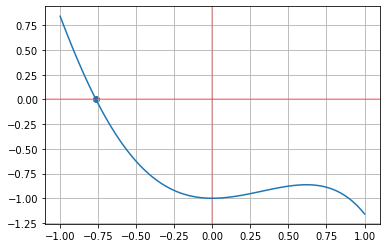

In [ ]:
 xvals=np.linspace(-1,1,100)
plt.plot(xvals,f(xvals))
plt.scatter(x,f(x))
#plt.scatter(secant(f,-1,0.5,1e-8)[0], f(secant(f,-1,0.5,1e-8)[0]))
plt.axhline(0,color='r',alpha=0.3)
plt.axvline(0,color='r',alpha=0.3)
plt.grid()
plt.show()

## Ejercicio de aplicación

$$-\frac{\hbar}{2m}\frac{d^2u}{dx^2}+V(x)u(x)=Eu(x)$$

$$ V(r)=   \left\{
\begin{array}{ll}
      -V_0 & 0\leq x < a \\
      0 & x > a \\
\end{array} 
\right.  $$



$$f(E)=\sqrt{2m(V_0-|E|)} cot\left(\sqrt{2ma^2(V_0-|E|)}/\hbar\right)\sqrt{2m|E|}$$

Graficar $f(E) vs |E|$ en MeV.  $f(E)$ tiene dimensiones Mev.

$V_0=20 MeV, \quad a=2 fm, \quad m=938 MeV$



In [ ]:
 xvals2=np.linspace(0,5,100)

In [ ]:
def f_E(E,m=938,V0=20,a=2e-15,hbar=6.582e-10):
  a1=np.sqrt(2*m*(V0-np.abs(E)))                                                #Primer término
  arg=np.sqrt(2*m*a**2*(V0-np.abs(E)))/hbar                                     #Auxiliar para el segundo término
  a2=1/np.tan(arg)                                                              #Segundo término
  a3=np.sqrt(2*m*np.abs(E))                                                     #Tercer término
  return(a1*a2*a3)

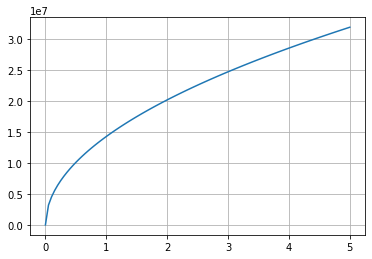

In [ ]:
plt.plot(xvals2,f_E(xvals2))
plt.grid()
plt.show()

In [ ]:
biseccion(f_E,0.5,30,1e-6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(20.000000201165676, 27)

Vemos que la energía de enlace deuteron es: $|E|=20 MeV$

## Sistemas de ecuaciones

El método es definido a partir de x0, una estimación inicial de la solución, a, lista de las constantes, max_iter, número máximo de iteraciones y tol, error permitido.

A partir de estos valores, por cada nueva iteración, construimos la matriz jacobiana A gracias al método jacobiano, y el vector B. Resolvemos el sistema lineal mediante el método definido en numpy, y obtenemos así una nueva estimación de la solución x1. Calculamos el error cometido en esta iteración y lo alojamos en e. Cuando se cumplan las condiciones del bucle while, devolvemos la solución de esa última iteración.

In [ ]:
import numpy
 
# CLASE  : Se refiere a la englobación de las funciones propias y solamente se llamen
#Se podría considerar una clase, como una pequeña librería, creada por nosotros
# Comando < Clase < Librería

#Es mas fácil trabajar con clases cuando quieres decir que otro objeto pertenece a esa clase



#El argumento 'self' es una referencia al mismo objeto instanciado por la clase. 
#El método __init__ funciona para establecer los atributos de la clase, si no se define atributos, 
#con la instrucción 'pass' abandona el método __init__ sin ejecutar ninguna instrucción




class Senl:                                                                     #Lo definimos como matriz para apoyarnos con matrices
    '''
    CLASE QUE DEFINE UN SISTEMA DE ECUACIONES NO LINEALES Y DIFERENTES 
    METODOS PARA HALLAR SU SOLUCION
    '''
    def __init__(self):                                                         #Variable inicial
        pass
     
    def newton(self,paso,numero):                                               #La función newton                                        
        return 0
     
    def llamada_funcion(self,x,a):                                              #Llamamos a la función
        resultado=self.funcion(x,a)
        return numpy.array(resultado)


###
#df(x,y)/dx  = [f(x+h,y)-f(x,y)]/h
#########################################
# JACOBIANO DEL SISTEMA 

    def jacobiano(self,x,a,tol=0.001):  
        res=[]                                                                  #lista vacía
        xtemp = numpy.array(x)                                                  #x temporal, dado que es un proceso iterativo, es una variable auxiliar
         
        x1=xtemp.copy()                                                         #x1, copia de xtemp
        

        for i in range(len(x1)):
            x2=x1.copy()                                                        #Realizó otra copia
            x2[i]+=tol                                                          #Mi tolerancia en este caso corresponde a mi "h" de una derivada, exceso de la tolerancia
            r=(self.llamada_funcion(x2,a)-self.llamada_funcion(x1,a))/tol       #Aquí realizó la derivada
            res.append(r)                                                       #guardo los datos en mi lista vacía al inicio
         
        jac=numpy.array(res[0])                                                 #Aquí guardo el jacobiano
        for i in range(len(res)-1):                                             
            jac=numpy.vstack((jac,numpy.array(res[i+1])))                       #Con este ciclo voy obteniendo mi matriz jacobiana. El vstack, me concatena una secuencia vertical
         
        return jac.transpose()                                                  #Me regresa la matriz transpuesta del jacobiano
 
 # ALGORITMO DE NEWTON

    def solver_newton(self,x0,a,max_iter=50,tol=0.0001):
        x1=numpy.array(x0)
        e=1.0
        iteracion=0
         
        while iteracion < max_iter and e > tol:

            A=self.jacobiano(x1,a)
            B=self.llamada_funcion(x1,a)

            res=numpy.linalg.solve(A,B)                                         #Solución de un sistema lineal (númerico)
            x1=x1-res
            e1=abs(res.max())
            e2=abs(res.min())
            e=max([e1,e2])                                                      #Obtener el error máximo
            print ("error: ", e)
            print ("Nº iteracion: ",iteracion)
            iteracion+=1
        return x1

###  NOMBRAMIENTO DEL EJEMPLO 

if __name__ == '__main__':
    def f(x,a):
        
        r=[0.0]*2
        
        #Planteamos un sistema de ecuaciones 
        r[0]=x[0]*x[1]-a[0]
        r[1]=x[0]+x[1]-a[1]
         
        return r

 # APLICACION 
         
    def drag(x,a):
        '''
        FUNCION PARA DETERMINAR EL COEFICIENTE DE RODADURA DE UN COCHE
        X[0] SERA EL COEFICIENTE DE RODADURA
        A[0] SERA EL PRODUCTO DEL COEFICIENTE AERODINAMICO POR LA SUPERFICIE
        FRONTAL
        A[1] SERA LA VELOCIDAD MAXIMA DEL COCHE
        A[2] SERA LA MASA DEL COCHE
        A[3] SERA LA POTENCIA MAXIMA DEL COCHE
        '''
        r=[0.0]*2
        rho=1.204
         
        r[0]=0.5*rho*a[0]*a[1]**3+x[0]*a[2]*9.81*a[1]-a[3]
        r[1]=x[1]-x[0]
        return r
     
    sistema=Senl()                                                              #Oriento a la clase que cree a la variable sistema
    sistema.funcion=drag                                                        
     
    print (sistema.solver_newton(x0=[1.0,0.0],a=[0.61,56.67,1340.0,90000.0]))   #Mis variables son x0 y a

    

error:  0.9689002297269909
Nº iteracion:  0
error:  1.9756776505407605e-13
Nº iteracion:  1
[0.03109977 0.03109977]


## Conclusiones

El método de Bisección es el único método cerrado de los métodos que se van a analizar, los métodos cerrados se caracterizan porque necesita de al menos dos valores iniciales entre los cuales se encuentre la raíz. El método de Newton-Raphson necesita una aproximación inicial, el método de la Secante necesita dos puntos iniciales pero la raíz no necesita estar contenida entre esos puntos.

Como se sabe, todos los métodos y las ecuaciones tanto matemáticas como computacionales tienen sus riesgos de fallar o de divergir. El método de Bisección es un poco inestable, tiene una lenta convergencia y un alto riesgo de divergencia, esto es debido al proceso en sí de bisectar y el error que puede existir en cada aproximación.

En cuanto al método de Newton-Raphson, no tiene un criterio general de convergencia, en algunos casos debido a la naturaleza de la función utilizada diverge, y todo el método depende de la primera derivada de esa función. Para el método de Secante, hay varias inseguridades en cuanto a la primera aproximación de la raíz, que no sea suficientemente cercana, ni cuando es una raíz múltiple y como en el método de Newton-Raphson, dependiendo de la naturaleza de la función, el método puede diverger.

**REQUISITOS PARA EL BUEN FUNCIONAMIENTO**

Metodo de Biseccion
La función debe ser continua, lineal, que cuente con mínimo una raíz y no se indetermine en ningún punto. El intervalo inicial  [a,b]  debe cumplir con la propiedad  $f(a)∗f(b)<0$ 

Metodo de Newton-Raphson \\
La funcion debe ser al menos dos veces derivable, la segunda derivada debe ser continua con el mismo signo y la primera derivada diferente a cero.

Metodo de la Secante \\
Es necesario conocer los valores  $x_i$  y  $x_{i−1}$  para poder sacar el valor de  $x_{i+1}$ .
Es necesario dar dos valores iniciales que no se encuentren afectados por asíntotas, puntos de inflexión, mínimos o máximos locales y pendientes que se aproximan a cero.

**RIESGO**

Metodo de Biseccion
Comportamiento inestable, lenta convergencia y alto riesgo de divergencia

Metodo de Newton-Raphson
No tiene un criterio general de convergencia.
Lenta convergencia en algunos casos debido a la naturaleza de la función. Depende de la primera derivada de la función en el punto.

Metodo de la Secante
No se asegura si la primera aproximación a la raíz no es lo suficientemente cercana a ella, ni cuando es raíz múltiple.

**CONVERGENCIA**

Metodo de Biseccion
Lenta pero posible si las funciones respetan el criterio de continuidad, evitan la indeterminación y se siga la condición de  $f(a)∗f(b)<0$  en los intervalos

Metodo de Newton-Raphson
Lenta debido a la naturaleza de la función. Cuando un punto de inflexión  $f′′(x)=0$ , ocurre en la vecindad de una raíz, el método oscila alrededor de un mínimo o máximo local o se encuentran pendientes cercanas a cero.

Metodo de la Secante
Convergencia superlineal inferior a la del método de Newton-Raphson.

**VENTAJA Y DESVENTAJA**

Metodo de Biseccion
V: Robusto y simple
D: Convergencia lenta y comportamiento inestable

Metodo de Newton-Raphson
V: Eficiente en ecuaciones no lineales, converge rápidamente en las condiciones apropiadas y proporciona una buena precisión.
D:No existe un criterio general de convergencia.Lenta convergencia dependiendo de la naturaleza de la función. Requiere conocer la primera derivada

Metodo de la Secante
V: Evita la complejidad de las derivadas, es independiente de los signos de la función.
D: Menor velocidad que otros métodos. No se asegura la primera aproximación a la raíz.

TOLERANCIA AL ERROR

Metodo de Biseccion
los errores disminuyen entre cada iteración, pero el error relativo porcentual verdadero es el más alto de los demás.
$Er=\frac{|x_f−x_o|}{2^n}$ 

Metodo de Newton-Raphson
Error proporcional al cuadrado del error anterior.

Metodo de la Secante
los errores disminuyen entre cada iteración, pero el error relativo porcentual verdadero es el más alto de los demás.
$Er=|x_f−x_o|≤\epsilon$ 

TIPO DE RAICES

Metodo de Biseccion
Raices REALES

Metodo de Newton-Raphson
Raices REALES

Metodo de la Secante
Raices REALES

CANTIDAD DE RAICES

Metodo de Biseccion
Una raiz

Metodo de Newton-Raphson
Una raiz

Metodo de la Secante
Una raiz

## 5. Recursos útiles

* ["Método de Bisección"](https://es.wikipedia.org/wiki/Método_de_bisección) - Wikipedia
* ["Punto fijo"](http://blog.espol.edu.ec/analisisnumerico/2-4-1-punto-fijo-ejemplo01/)
* ["How to Think Like a Computer Scientist"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/merging_dataframes_tutorial_max_palko.ipynb) - Think Python Versión 2.0.17 by Allen Doney. (libro completo [aquí](https://www.greenteapress.com/thinkpython/thinkpython.pdf))
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn 


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>